In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns
import numpy as np
import pandas as pd
from causalgraphicalmodels import CausalGraphicalModel

### The Fork
In a fork a variable confounds others. 
In the example below, C cofounds A and B. And that means that if we're want to learn B then A tells nothing about it when we condition on C.
<br>
<br>
A and B are independent, conditional on C.

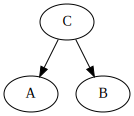

In [8]:
# the fork
assoc = CausalGraphicalModel(
    nodes=["A", "B", "C"], edges=[("C", "A"), ("C", "B")]
)

assoc.draw()

Lets run 2 simulations to see how the fork works. 
<br>
First we need to simulate some data.

In [38]:
SAMP_SIZE = 100

np.random.seed(89)
C = stats.norm.rvs(size=SAMP_SIZE) 
B = stats.norm.rvs(C)
A = stats.norm.rvs(C)

df = pd.DataFrame.from_dict({"A": A, "B": B, "C": C})

Regressing B on A we have:

In [39]:
with pm.Model() as m_fork:
    a = pm.Normal('a', mu=0, sigma=1)
    bA = pm.Normal('bA', mu=0, sigma=1)
    
    mu = a + bA*df.A
    sigma = pm.Exponential('sigma', 1)
    
    B = pm.Normal('B', mu=mu, sigma=sigma, observed=df.B)
    
    m_fork_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bA, a]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:00<00:00, 5237.63draws/s]


In [43]:
az.summary(m_fork_trace, round_to=2, kind="stats")

/home/elisio/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%
a,-0.03,0.11,-0.23,0.17
bA,-0.11,0.11,-0.32,0.09
bC,1.14,0.16,0.83,1.45
sigma,1.04,0.08,0.90,1.19


We can see by the coeficient **bA** that **A** has some positive correlation with **B**.  

Regressing B on A and C:

In [41]:
with pm.Model() as m_fork:
    a = pm.Normal('a', mu=0, sigma=1)
    bA = pm.Normal('bA', mu=0, sigma=1)
    bC = pm.Normal('bC', mu=0, sigma=1)
    
    mu = a + bA*df.A + bC*df.C
    sigma = pm.Exponential('sigma', 1)
    
    B = pm.Normal('B', mu=mu, sigma=sigma, observed=df.B)
    
    m_fork_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bC, bA, a]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:00<00:00, 4498.45draws/s]


In [42]:
az.summary(m_fork_trace, round_to=2, kind="stats")

/home/elisio/anaconda3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%
a,-0.03,0.11,-0.23,0.17
bA,-0.11,0.11,-0.32,0.09
bC,1.14,0.16,0.83,1.45
sigma,1.04,0.08,0.90,1.19


However, when we add **C** in the model, which is the confounding, **A** doesn't tell anything else about **B**. That can be seen by the **A**'s coeficient being around zero.

### The Pipe


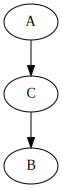

In [9]:
# the pipe
assoc = CausalGraphicalModel(
    nodes=["A", "B", "C"], edges=[("A", "C"), ("C", "B")]
)

assoc.draw()

In [38]:
SAMP_SIZE = 100

np.random.seed(89)
A = stats.norm.rvs(size=SAMP_SIZE) 
C = stats.norm.rvs(A)
B = stats.norm.rvs(C)

df = pd.DataFrame.from_dict({"A": A, "B": B, "C": C})

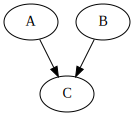

In [10]:
# the collider
assoc = CausalGraphicalModel(
    nodes=["A", "B", "C"], edges=[("A", "C"), ("B", "C")]
)

assoc.draw()

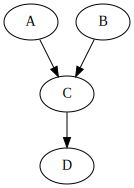

In [11]:
# the descendant
assoc = CausalGraphicalModel(
    nodes=["A", "B", "C", "D"], edges=[("A", "C"), ("B", "C"), ("C", "D")]
)

assoc.draw()

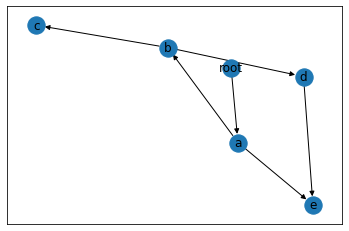

In [3]:
import networkx as nx
graph = nx.DiGraph()
graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])

nx.draw_networkx(graph)

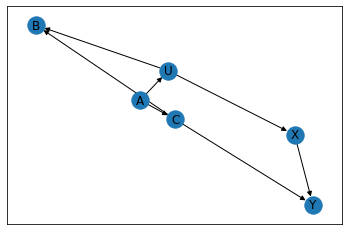

In [4]:
graph = nx.DiGraph()
graph.add_edges_from([("X", "Y"), ("U", "X"), ("A", "U"), ("A", "C"), ("C", "Y"), ("U", "B"), ("C", "B")])

nx.draw_networkx(graph)

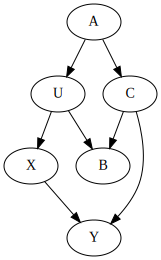

In [12]:
# the descendant
assoc = CausalGraphicalModel(
    nodes=["X", "U", "A", "C", "B", "Y"],
    edges=[("X", "Y"), ("U", "X"), ("A", "U"), ("A", "C"), ("C", "Y"), ("U", "B"), ("C", "B")]
)

assoc.draw()